<a href="https://colab.research.google.com/github/sameersat96/Play-store-data-analysis/blob/main/first_step_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

import seaborn as sns              # for making plots with seaborn
color = sns.color_palette()

import warnings
warnings.filterwarnings('ignore')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path  = "/content/drive/MyDrive/Colab Notebooks/CAPSTONE PROJECT/"
 
play_store_df = pd.read_csv(path + "Copy of Play Store Data.csv")
user_review_df = pd.read_csv(path + "Copy of User Reviews.csv")

In [ ]:
play_store_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
user_review_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
print(play_store_df.shape)
print(user_review_df.shape)

(10841, 13)
(64295, 5)


#**DATA CLEANING**

In [ ]:
# First we need to find missing value in our data
print( ' ' ' missing value is as following' + '\n\n' + ' ' '*'*20)

play_store_df.isnull().sum()


  missing value is as following

 * * * * * * * * * * * * * * * * * * * *


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Data can contain duplicate,NaN type,wrong data type so that we need to clean our data

In [ ]:
#checking for duplicates
play_store_df[play_store_df.duplicated(subset=['App'], keep='first')]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,FarmersOnly Dating,DATING,3.0,1145,1.4M,"100,000+",Free,0,Mature 17+,Dating,"February 25, 2016",2.2,4.0 and up
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0M,"1,000,000+",Free,0,Everyone,Communication,"July 6, 2018",5.2,5.0 and up
10730,FP Notebook,MEDICAL,4.5,410,60M,"50,000+",Free,0,Everyone,Medical,"March 24, 2018",2.1.0.372,4.4 and up
10753,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,12M,"1,000,000+",Free,0,Everyone,Shopping,"July 30, 2018",3.9,4.4 and up


Above output retrive 1181 duplicates data so need to drop this data

In [ ]:
#delete duplicates from App column.
play_store_df.drop_duplicates(subset=['App'],keep='first', inplace=True, ignore_index=True)


check data remove or not

In [ ]:
play_store_df[play_store_df.duplicated(subset=['App'], keep='first')]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [ ]:
play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9660 entries, 0 to 9659
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9660 non-null   object 
 1   Category        9660 non-null   object 
 2   Rating          8197 non-null   float64
 3   Reviews         9660 non-null   object 
 4   Size            9660 non-null   object 
 5   Installs        9660 non-null   object 
 6   Type            9659 non-null   object 
 7   Price           9660 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9660 non-null   object 
 10  Last Updated    9660 non-null   object 
 11  Current Ver     9652 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(1), object(12)
memory usage: 981.2+ KB


In [ ]:
play_store_df.isnull().sum()


App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Here you can see that Rating seem to have a very high number of missing observations. The current ver, Android ver and content rating also have missing values, as you can see, but they’re pretty negligible compared to Rating.

Replace all null value with their appropriate values use **aggregate function** such as **mean,mode,median**

In [ ]:
# Replacing the null values with the median in the rating column.

median_val =round(play_store_df['Rating'].median(),2)
#median_val
play_store_df['Rating'].fillna(median_val,inplace=True)


In [ ]:
play_store_df['Current Ver'].fillna(play_store_df['Current Ver'].mode()[0],inplace=True)
play_store_df['Android Ver'].fillna(play_store_df['Android Ver'].mode()[0],inplace=True)
play_store_df['Content Rating'].fillna(play_store_df['Content Rating'].mode()[0],inplace = True)

In [ ]:
# Finding the mod values of column and replacing it null values.

mode_val_type = play_store_df['Type'].mode()[0]
mode_val_type

'Free'

In [ ]:
play_store_df['Type'].fillna(mode_val_type,inplace=True)


In [ ]:
play_store_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

**Checking outliers**



*   on playstore rating done between 1 to 5 so we need to drop any rating other than this




In [ ]:
play_store_df[play_store_df.Rating<1]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [ ]:
play_store_df[play_store_df['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9300,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,Everyone,"February 11, 2018",1.0.19,4.0 and up,4.1 and up


In [ ]:
play_store_df.drop([9300],inplace=True)

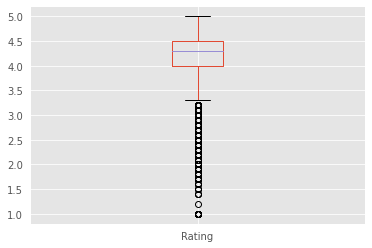

In [ ]:
play_store_df.boxplot()

it shows there is no rating present below 1 and above 5


play store review should not more than installs so we need to check data for same

In [ ]:
play_store_df.loc[play_store_df['Reviews']>play_store_df['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9653,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
9656,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
9657,Parkinson Exercices FR,MEDICAL,4.3,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
9658,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [ ]:
# removing fake data firstly store in temporary variable
temp_= play_store_df.loc[play_store_df['Reviews']>play_store_df['Installs']].index
play_store_df.drop(labels=temp_,inplace=True)

In [ ]:
play_store_df.loc[play_store_df['Reviews']>play_store_df['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [ ]:
play_store_df.isnull().sum()    # missing value procedure done

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

clean data more precisely each column wise

In [ ]:
# We need to clean data 
# remove '+' and ',' in Installs column

play_store_df['Installs']=play_store_df['Installs'].apply(lambda x: x.replace('+','') if '+' in str(x) else x)
play_store_df['Installs']=play_store_df['Installs'].apply(lambda x: x.replace(',','') if ',' in str(x) else x)

play_store_df = play_store_df[~(play_store_df['Installs'] == "Free")].reset_index(drop=True)  #drop  Free from Installs column

play_store_df['Installs']=play_store_df['Installs'].apply(lambda x: int(x)) # convert to int

# Remove '$' from Price column and change to float type
play_store_df['Price']=play_store_df['Price'].apply(lambda x: x.replace('$','') if '$' in str(x) else x)
play_store_df['Price']=play_store_df['Price'].apply(lambda x: float(x))

play_store_df = play_store_df[~(play_store_df['Price'] == "Everyone")].reset_index(drop=True)  #drop 'Everyone from Price column


In [ ]:
play_store_df = play_store_df[~(play_store_df['Size'] == "Varies with device")].reset_index(drop=True)  #drop Varies with device from Price column


In [ ]:
play_store_df['Size']=play_store_df['Size'].apply(lambda x: str(x).replace('M','').replace('+','').replace(',','') if 'M' in str(x) else x)

# need to convert kb to Mb formula Mb=kb/1024

play_store_df['Size']=play_store_df['Size'].apply(lambda x: float(str(x).replace('k',''))/1024 if 'k' in str(x) else x)



### change datatype with respect to their data
play_store_df['Size']=play_store_df['Size'].astype(float)
play_store_df['Reviews']=play_store_df['Reviews'].astype(int)


change datatype of last updated to datetime

In [ ]:
play_store_df['Last Updated'] = pd.to_datetime(play_store_df['Last Updated'])
#play_store_df['Last Updated']

#**Correct Data Type**

In [ ]:
play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2450 entries, 0 to 2449
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             2450 non-null   object        
 1   Category        2450 non-null   object        
 2   Rating          2450 non-null   float64       
 3   Reviews         2450 non-null   int64         
 4   Size            2450 non-null   float64       
 5   Installs        2450 non-null   int64         
 6   Type            2450 non-null   object        
 7   Price           2450 non-null   float64       
 8   Content Rating  2450 non-null   object        
 9   Genres          2450 non-null   object        
 10  Last Updated    2450 non-null   datetime64[ns]
 11  Current Ver     2450 non-null   object        
 12  Android Ver     2450 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 249.0+ KB


#**Basic observation**

**Average App Rating**

In [ ]:
play_store_df['Rating'].mean()

4.19779591836731

**Find top five category getting Higest average Rating**

In [ ]:
play_store_df.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(5)

Category
PARENTING          4.560000
ART_AND_DESIGN     4.507143
EVENTS             4.366667
PERSONALIZATION    4.338614
FOOD_AND_DRINK     4.335714
Name: Rating, dtype: float64

**Find app with 5 star rating**

In [ ]:
play_store_df[play_store_df['Rating']==5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
103,Spine- The dating app,DATING,5.0,5,9.3,500,Free,0.00,Teen,Dating,2018-07-14,4.0,4.0.3 and up
155,SUMMER SONIC app,EVENTS,5.0,4,61.0,500,Free,0.00,Everyone,Events,2018-07-24,1.0,4.4 and up
157,Mindvalley U Tallinn 2018,EVENTS,5.0,1,21.0,100,Free,0.00,Everyone,Events,2018-07-03,1.0.5,4.4 and up
330,FHR 5-Tier 2.0,MEDICAL,5.0,2,1.2,500,Paid,2.99,Everyone,Medical,2015-12-16,1.0,4.0 and up
370,Labs on Demand,MEDICAL,5.0,1,22.0,10,Free,0.00,Everyone,Medical,2018-08-03,1.2,4.2 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2284,Santa Fe Thrive,HEALTH_AND_FITNESS,5.0,2,8.3,50,Free,0.00,Everyone,Health & Fitness,2018-07-09,4.2.2,4.1 and up
2336,FK CLASSIC FOR YOU,BUSINESS,5.0,1,3.5,10,Free,0.00,Everyone,Business,2018-02-20,1.1.0,4.0 and up
2376,"Trinity Church Deltona, FL",LIFESTYLE,5.0,33,28.0,500,Free,0.00,Everyone,Lifestyle,2018-05-07,1.9.0.0,2.3.3 and up
2390,FN,BUSINESS,5.0,14,3.3,50,Free,0.00,Everyone,Business,2018-02-01,1.0,4.0 and up


**Total number of free and paid apps**

In [ ]:
play_store_df['Type'].value_counts()

Free    2220
Paid     230
Name: Type, dtype: int64

**find app which has maximum reviews**

In [ ]:
app_name=play_store_df[play_store_df['Reviews'].max()==play_store_df['Reviews']]['App'].index

play_store_df['App'][app_name]

243    Candy Crush Saga
Name: App, dtype: object

**Display top 5 Apps having highest reviews**

In [ ]:
index1=play_store_df['Reviews'].sort_values(ascending=False).head().index

play_store_df.iloc[index1]['App']

243                               Candy Crush Saga
57     UC Browser - Fast Download Private & Secure
245                                            Pou
596                    Gangstar Vegas - mafia game
53                   imo free video calls and chat
Name: App, dtype: object

**Display top 5 app having maximum Installs**

In [ ]:
install=play_store_df['Installs'].sort_values(ascending=False).head().index
play_store_df.iloc[install]['App']

245                                            Pou
924                                 Samsung Health
57     UC Browser - Fast Download Private & Secure
243                               Candy Crush Saga
507                                        Dropbox
Name: App, dtype: object

#**DATA VISUALIZATION**

In [ ]:
grp=play_store_df.groupby('Category')
x=grp['Installs'].agg(np.mean)
y=grp['Price'].agg(np.sum)
z=grp['Reviews'].agg(np.mean)
print(x)
print(y)
print(z)

Category
ART_AND_DESIGN         4.022150e+06
AUTO_AND_VEHICLES      3.407910e+05
BEAUTY                 5.468393e+05
BOOKS_AND_REFERENCE    8.650937e+04
BUSINESS               4.969710e+05
COMICS                 1.665050e+05
COMMUNICATION          1.402430e+07
DATING                 3.674067e+05
EDUCATION              1.589474e+06
ENTERTAINMENT          8.881250e+06
EVENTS                 2.870245e+05
FAMILY                 2.088615e+06
FINANCE                5.370616e+05
FOOD_AND_DRINK         8.127300e+05
GAME                   1.370227e+07
HEALTH_AND_FITNESS     6.907083e+06
HOUSE_AND_HOME         4.563295e+05
LIBRARIES_AND_DEMO     1.282771e+05
LIFESTYLE              5.753118e+05
MAPS_AND_NAVIGATION    3.170282e+06
MEDICAL                9.337955e+04
NEWS_AND_MAGAZINES     4.984100e+05
PARENTING              1.210020e+05
PERSONALIZATION        1.450088e+06
PHOTOGRAPHY            3.952206e+06
PRODUCTIVITY           6.311599e+06
SHOPPING               1.526097e+06
SOCIAL             

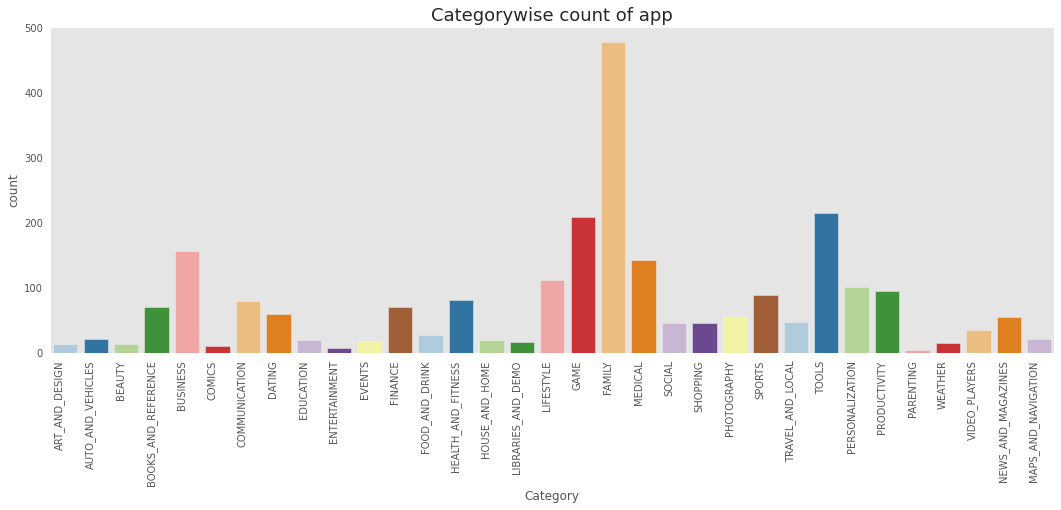

In [ ]:
plt.figure(figsize=(18,6))

ax = sns.countplot(x="Category",data=play_store_df,palette="Paired")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax 
plt.title('Categorywise count of app',size = 18)
ax.grid(False)
sns.set_style('white')




*   Game and family subsequently catch high number of market place.
*   Tools,medical and lifestyle aslo catch market prevelance



**Rating of apps**

average rating for app is 4.1978


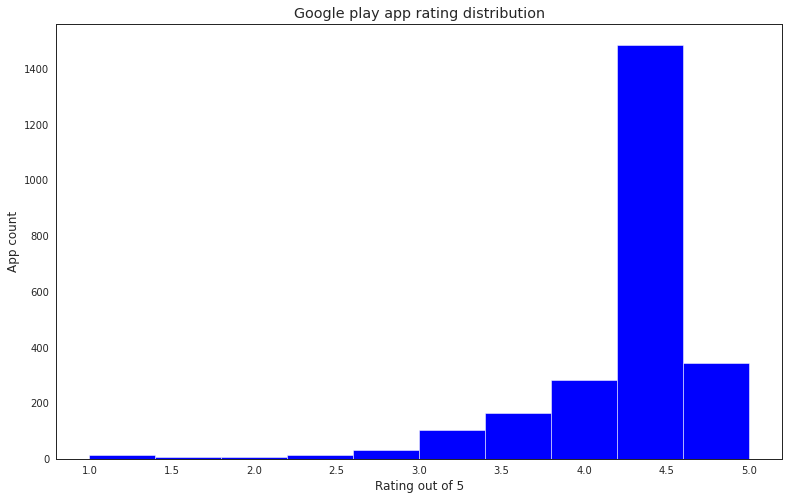

In [ ]:
#plot histogram from rating column
plt.figure(figsize=(13,8))
print(f"average rating for app is {round(play_store_df['Rating'].mean(),5)}")

play_store_df['Rating'].hist(color='b')
plt.title('Google play app rating distribution')
plt.ylabel('App count')
plt.xlabel('Rating out of 5')
plt.grid(False)
plt.show()

This histogram shows max rating is between 4.1 above

**App size light or bulky?**

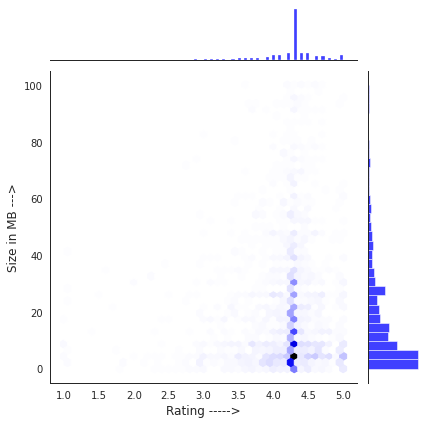

In [ ]:

# draw jointplot with
# hex kind
sns.jointplot(x = "Rating", y = "Size",
              kind = "hex",color='b', data = play_store_df)
plt.ylabel('Size in MB --->')
plt.xlabel('Rating ----->')
# Show the plot
plt.show()

 

*   From above join plot we can colculde that most of good rating app i.e between 4-4.5 is having size 0.1-20MB.

*   generally we see high rating means high size apps that not always true.



**Price category**

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fdec3a27c90>],
      dtype=object)

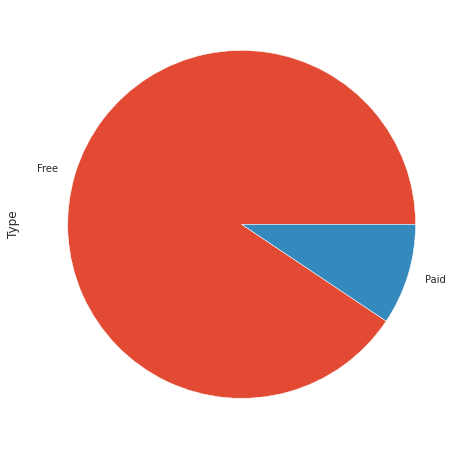

In [ ]:
play_store_df['Type'].value_counts().plot.pie(figsize=(12,8),subplots=True)


In [ ]:
play_store_df['Type'].value_counts()

Free    2220
Paid     230
Name: Type, dtype: int64

In [ ]:
play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2450 entries, 0 to 2449
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             2450 non-null   object        
 1   Category        2450 non-null   object        
 2   Rating          2450 non-null   float64       
 3   Reviews         2450 non-null   int64         
 4   Size            2450 non-null   float64       
 5   Installs        2450 non-null   int64         
 6   Type            2450 non-null   object        
 7   Price           2450 non-null   float64       
 8   Content Rating  2450 non-null   object        
 9   Genres          2450 non-null   object        
 10  Last Updated    2450 non-null   datetime64[ns]
 11  Current Ver     2450 non-null   object        
 12  Android Ver     2450 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 249.0+ KB
